## GEV fit

In [69]:
import pandas as pd
import numpy as np
from scipy.stats import genextreme
import single_loc_eval as sle
import matplotlib.pyplot as plt

from utils import roar_data_path as project_data_path
from utils import city_list

In [416]:
import importlib
importlib.reload(sle)

<module 'single_loc_eval' from '/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/src/single_loc_eval.py'>

In [ ]:
df_coverage = []

for metric_id in ["max_tasmax", "min_tasmin", "max_pr"]:
    for city in city_list:
        # Read
        df_obs = pd.read_csv(f'{project_data_path}/metrics/cities/{city}_{metric_id}.csv')
        df_ns_fit = pd.read_csv(f'{project_data_path}/extreme_value/cities/original_grid/freq/{city}_{metric_id}_1950-2100_mle_nonstat_nboot100_samples.csv')
    

        # Get all coverage stats
        combos = df_fit.set_index(["ensemble", "gcm", "member", "ssp"]).sort_index().index.unique()

        for combo in combos:
            ensemble, gcm, member, ssp = combo
            # Calculate coverage
            coverage = sle.gev_qq_plot(
                df_fit=df_fit,
                df_obs=df_obs,
                metric_id=metric_id,
                gcm=gcm,
                ssp=ssp,
                member=member,
                ensemble=ensemble,
                gev_type='nonstat',
                confidence_level=0.95,
                make_plot=False
                )
            # Append
            df_coverage.append({"city":city,
                                "metric_id":metric_id,
                                "ensemble":ensemble,
                                "gcm":gcm,
                                "member":member,
                                "ssp":ssp,
                                "coverage":coverage})

# Concat
df_coverage = pd.DataFrame(df_coverage).dropna()

/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/src/single_loc_eval.py:164: RuntimeWarning: invalid value encountered in log
  * np.log(


In [ ]:
# Concat
df_coverage = pd.DataFrame(df_coverage).dropna()

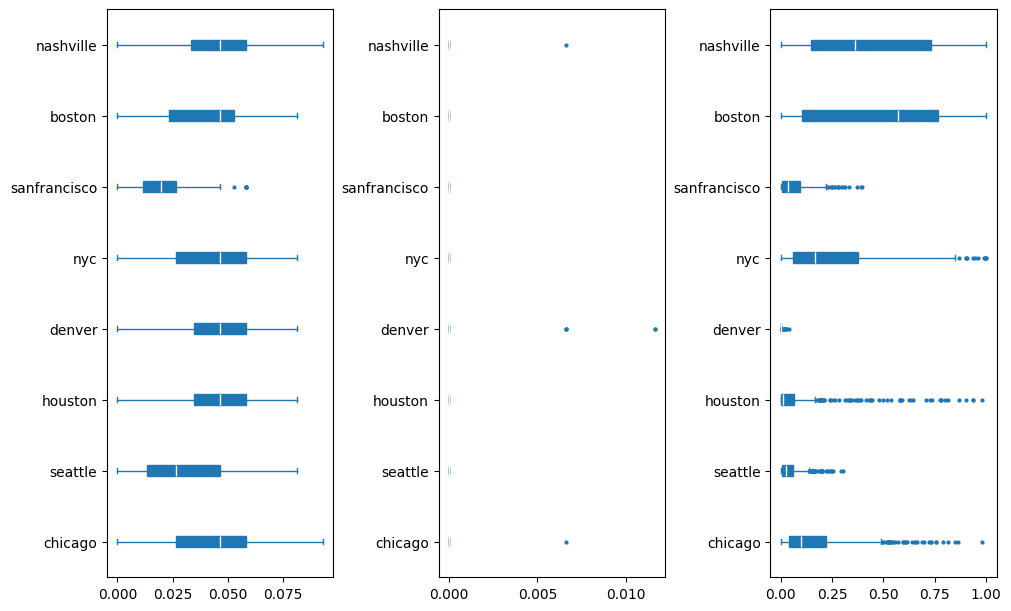

In [146]:
# Plot
fig, axs = plt.subplots(1, 3, figsize=(10,6), layout='constrained')

c='C0'

for idm, metric_id in enumerate(["max_tasmax", "min_tasmin", "max_pr"]):
    ax = axs[idm]
    for idc, city in enumerate(list(city_list.keys())):
        data = df_coverage[(df_coverage['city'] == city) & (df_coverage['metric_id'] == metric_id)]
        ax.boxplot(x = data['coverage'],
                   positions = [idc],
                   vert=False,
                   patch_artist=True,
                   boxprops=dict(facecolor=c, color=c),
                   capprops=dict(color=c, lw=1),
                   whiskerprops=dict(color=c, lw=1),
                   flierprops=dict(color=c, markerfacecolor=c, markeredgecolor=c, markersize=2),
                   medianprops=dict(color='white', lw=1))
    ax.set_yticklabels(list(city_list.keys()))
plt.show()